In [1]:
import numpy as np 
import pandas as pd
from tqdm import tqdm
import os

In [2]:
path = "C:/Users/18565/Desktop/Classes/VA/Project/Code/VA-Project"

In [3]:
selfloop_df = pd.read_csv(os.path.join(path,"data/selploop.csv"),index_col=0)
selfloop_df['car_type'] = selfloop_df['car_type'].astype("str")

C:\Users\18565\AppData\Local\Temp\ipykernel_5008\678320754.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  selfloop_df = pd.read_csv(os.path.join(path,"data/selploop.csv"),index_col=0)


In [4]:
selfloop_df = selfloop_df[(selfloop_df['car_type']=="1") | (selfloop_df['car_type']=="2") | (selfloop_df['car_type']=="3") ]

In [16]:
cartypes = ['4', '5', '6']
data = []
car_type = []
for cartype in cartypes:
    time_df = selfloop_df[selfloop_df['car_type']==cartype]
    data.append(time_df['total_in_time'])
    car_type.append("Car Type :"+cartype)

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

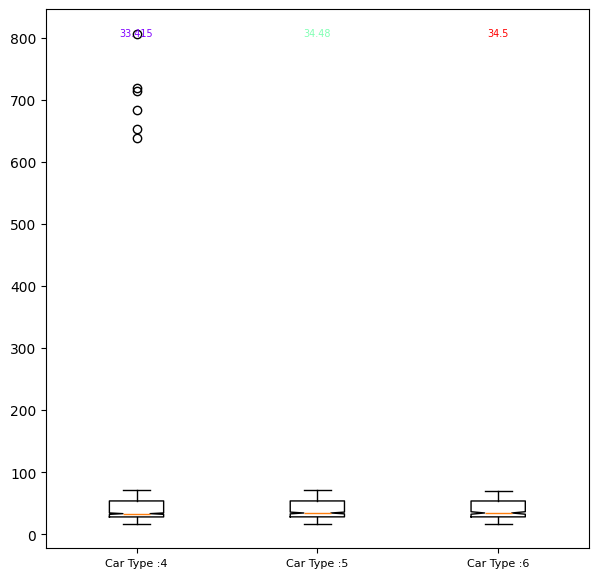

In [17]:
fig,ax = plt.subplots(1,1,figsize=(7,7))



outlier_ = []
data_medians = []

bp = ax.boxplot(data,notch=True,vert=True, whis=1.5)
ax.set_xticklabels(car_type, fontsize=8)
medians =  [i.get_ydata()[1] for i in bp['medians']]
data_medians +=medians
colors = cm.rainbow(np.linspace(0, 1, 3))
pos = np.arange(3) + 1
for tick, label in zip(range(3), ax.get_xticklabels()):
    ax.text(pos[tick], .95, medians[tick],
            transform=ax.get_xaxis_transform(),
            horizontalalignment='center', size='x-small',color=colors[tick])
for i in range(0,len(bp['whiskers']),2):
    outlier_.append((bp['whiskers'][i].get_ydata()[1],bp['whiskers'][i+1].get_ydata()[1]))

plt.show() 

In [18]:
outlier_points = []
for X,cartype,outlier in zip(data,cartypes,outlier_):
    outlier_points.append((cartype,X[(X<outlier[0])| (X>outlier[1])]))

In [47]:
def outlier_points_to_df(points,selfloop_df):
    df = pd.DataFrame()
    for _,data in points:
        df = pd.concat((df,selfloop_df.loc[data.index]))
    return df

In [48]:
outlier_df =  outlier_points_to_df(outlier_points,selfloop_df)

In [58]:
cols = outlier_df.columns[5:-3]

In [104]:
df[df['car-id']==]

,car-id,car_type,enter_date,exit_date,total_in_time,camping0,camping1,camping2,camping3,camping4,...,ranger-stop1,ranger-stop2,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7,selfloop,entry_gate,exit_gate
15272,20150204100226-134,4,2015-07-04 22:02:26,2015-07-05 08:41:17,638.85,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance1,entrance4


In [102]:
outlier_df

,car-id,car_type,enter_date,exit_date,total_in_time,camping0,camping1,camping2,camping3,camping4,...,ranger-stop1,ranger-stop2,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7,selfloop,entry_gate,exit_gate
15272,20150204100226-134,4,2015-07-04 22:02:26,2015-07-05 08:41:17,638.85,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance1,entrance4
15299,20150322080300-861,4,2015-10-22 20:03:00,2015-10-23 07:27:00,684.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance0,entrance4
15738,20153427103455-30,4,2015-06-27 22:34:55,2015-06-28 09:28:29,653.57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance2,entrance1
15914,20154501084537-684,4,2015-09-01 20:45:37,2015-09-02 08:40:47,715.17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance3,entrance0
16150,20160623090611-424,4,2016-03-23 21:06:11,2016-03-24 09:05:31,719.33,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance1,entrance2
16172,20161008061012-639,4,2016-05-08 18:10:12,2016-05-09 07:36:46,806.57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance3,entrance4


In [89]:
[colors[ind]]*len(outlier_df)

[(30, 185, 196, 1),
 (30, 185, 196, 1),
 (30, 185, 196, 1),
 (30, 185, 196, 1),
 (30, 185, 196, 1),
 (30, 185, 196, 1)]

In [94]:
ind

7

In [99]:
ind%

8

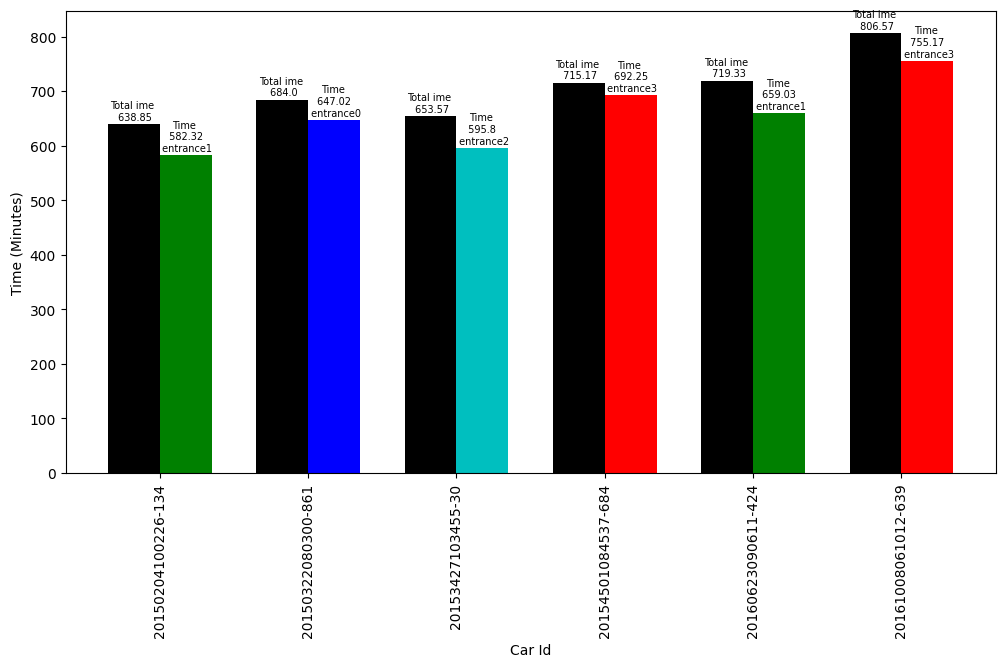

In [101]:
fig,ax = plt.subplots(figsize=(12,6))

index = np.arange(len(outlier_df))


bar_width = 0.35
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# Plotting the bars
bars = ax.bar(index, outlier_df['total_in_time'], bar_width,color='k')
for bar in bars:
    height = bar.get_height()
    if height > 0:
        ax.annotate(f'Total ime \n {height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center',
                fontsize=7)

ind = 1
for col in outlier_df.columns[5:-3]:
    bars = ax.bar(index + bar_width,outlier_df[col],bar_width,color= colors[len(colors)%ind])
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ind+=1
            ax.annotate(f'Time \n {height} \n {col}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center',
                    fontsize=7)
  
plt.xticks(index + bar_width / 2,outlier_df['car-id']) 
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Car Id')
ax.set_ylabel('Time (Minutes)')
plt.show()

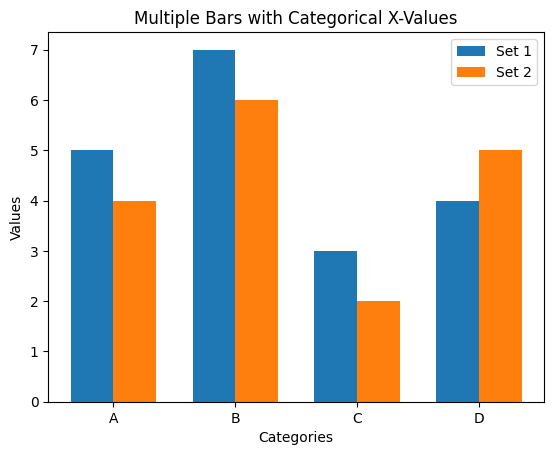

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['A', 'B', 'C', 'D']
values1 = [5, 7, 3, 4]
values2 = [4, 6, 2, 5]

# Define the width of the bars
bar_width = 0.35

# Generate index for bars
index = np.arange(len(categories))

# Plotting the bars
plt.bar(index, values1, bar_width, label='Set 1')
plt.bar(index + bar_width, values2, bar_width, label='Set 2')

# Adding labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multiple Bars with Categorical X-Values')
  # Set x-ticks positions and labels
plt.legend()

# Show plot
plt.show()


In [29]:
pd.DataFrame(selfloop_df.loc[15299]).T

,car-id,car_type,enter_date,exit_date,total_in_time,camping0,camping1,camping2,camping3,camping4,...,ranger-stop1,ranger-stop2,ranger-stop3,ranger-stop4,ranger-stop5,ranger-stop6,ranger-stop7,selfloop,entry_gate,exit_gate
15299,20150322080300-861,4,2015-10-22 20:03:00,2015-10-23 07:27:00,684.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,entrance0,entrance4


In [25]:
selfloop_df.loc[15272]

car-id            20150204100226-134
car_type                           4
enter_date       2015-07-04 22:02:26
exit_date        2015-07-05 08:41:17
total_in_time                 638.85
camping0                         0.0
camping1                         0.0
camping2                         0.0
camping3                         0.0
camping4                         0.0
camping5                         0.0
camping6                         0.0
camping7                         0.0
camping8                         0.0
entrance0                        0.0
entrance1                     582.32
entrance2                        0.0
entrance3                        0.0
entrance4                        0.0
gate0                            0.0
gate1                            0.0
gate2                            0.0
gate3                            0.0
gate4                            0.0
gate5                            0.0
gate6                            0.0
gate7                            0.0
g

In [22]:
outlier_points

[('4',
  15272    638.85
  15299    684.00
  15738    653.57
  15914    715.17
  16150    719.33
  16172    806.57
  Name: total_in_time, dtype: float64),
 ('5', Series([], Name: total_in_time, dtype: float64)),
 ('6', Series([], Name: total_in_time, dtype: float64))]

In [9]:
old = pd.read_csv(os.path.join(path,"data/Lekagul Sensor Data.csv"))